# Project Data EDA
This notebook works with a subset of the full dataset, with trips from August 2022 only.

## Import necessary packages

In [99]:
import csv
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

## Import CSV data file

In [72]:
url = 'https://media.githubusercontent.com/media/roy-kim-33/DataScienePipeline-Project/main/Transportation_Network_Providers_-_Trips.csv'
df = pd.read_csv(url)
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,09ee899e334319dc032d779f363e5928da5625ab,08/01/2022 12:00:00 AM,08/01/2022 12:15:00 AM,739,3.9,NaN,NaN,15.0,22.0,7.5,...,4.26,11.76,False,1,41.954028,-87.763399,POINT (-87.7633990316 41.9540276487),41.922761,-87.699155,POINT (-87.6991553432 41.9227606205)
1,0fb424c2951f0ad29649dcac6117625b320d5284,08/01/2022 12:00:00 AM,08/01/2022 12:15:00 AM,865,6.0,NaN,NaN,24.0,60.0,12.5,...,0.31,12.81,True,2,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.836150,-87.648788,POINT (-87.6487879519 41.8361501547)
2,1736434e3835e5835052ce5d6d488f62d308afb4,08/01/2022 12:00:00 AM,08/01/2022 12:45:00 AM,2806,23.6,NaN,NaN,56.0,14.0,47.5,...,6.81,62.31,False,1,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.968069,-87.721559,POINT (-87.7215590627 41.968069)
3,19c6902c2517c90a0d00ca41a78ece174a84369c,08/01/2022 12:00:00 AM,08/01/2022 12:15:00 AM,931,5.1,NaN,NaN,41.0,46.0,10.0,...,4.18,14.18,False,1,41.794090,-87.592311,POINT (-87.592310855 41.794090253),41.741243,-87.551428,POINT (-87.551428197 41.7412427285)
4,1a5617a9da5970deacc7cf8e022a7441d0d43229,08/01/2022 12:00:00 AM,08/01/2022 12:15:00 AM,689,4.3,NaN,NaN,15.0,21.0,7.5,...,3.49,10.99,False,1,41.954028,-87.763399,POINT (-87.7633990316 41.9540276487),41.938666,-87.711211,POINT (-87.7112105933 41.9386661962)


## Topics to investigate
1. color matrix of (fare price / duration) or (fare price / distance) by pickup/dropoff community area (**Nathan**)
2. geopandas heatmap of (fare price / duration) or (fare price / distance) by pickup/dropoff centroid location
3. plot additional charges with every field to examine which aspect of a trip correlates to the additional charges
4. plot fare price with day of the week and/or pickup/dropoff times (**Roy**)
5. plot fare price with trip duration / trip distance(2D and 3D)
6. plot fareprice with velocity (distance/duration)
7. plot trip distance or duration with day of week / time of day
8. plot day of week or time of day with velocity
9. plot long, lat coordinates with additional charge as color or size

In [73]:
df.columns

Index(['Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location'],
      dtype='object')

In [74]:
clean_df = df.drop(columns=['Pickup Centroid Location', 'Dropoff Centroid Location'])
clean_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,09ee899e334319dc032d779f363e5928da5625ab,08/01/2022 12:00:00 AM,08/01/2022 12:15:00 AM,739,3.9,NaN,NaN,15.0,22.0,7.5,0.0,4.26,11.76,False,1,41.954028,-87.763399,41.922761,-87.699155
1,0fb424c2951f0ad29649dcac6117625b320d5284,08/01/2022 12:00:00 AM,08/01/2022 12:15:00 AM,865,6.0,NaN,NaN,24.0,60.0,12.5,0.0,0.31,12.81,True,2,41.901207,-87.676356,41.836150,-87.648788
2,1736434e3835e5835052ce5d6d488f62d308afb4,08/01/2022 12:00:00 AM,08/01/2022 12:45:00 AM,2806,23.6,NaN,NaN,56.0,14.0,47.5,8.0,6.81,62.31,False,1,41.792592,-87.769615,41.968069,-87.721559
3,19c6902c2517c90a0d00ca41a78ece174a84369c,08/01/2022 12:00:00 AM,08/01/2022 12:15:00 AM,931,5.1,NaN,NaN,41.0,46.0,10.0,0.0,4.18,14.18,False,1,41.794090,-87.592311,41.741243,-87.551428
4,1a5617a9da5970deacc7cf8e022a7441d0d43229,08/01/2022 12:00:00 AM,08/01/2022 12:15:00 AM,689,4.3,NaN,NaN,15.0,21.0,7.5,0.0,3.49,10.99,False,1,41.954028,-87.763399,41.938666,-87.711211


In [75]:
def str2datetime(s: str) -> datetime:
    return datetime.strptime(s, '%m/%d/%Y %I:%M:%S %p')

clean_df['Trip Start Timestamp'] = clean_df['Trip Start Timestamp'].apply(str2datetime)
clean_df['Trip End Timestamp'] = clean_df['Trip End Timestamp'].apply(str2datetime)
clean_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,09ee899e334319dc032d779f363e5928da5625ab,2022-08-01,2022-08-01 00:15:00,739,3.9,NaN,NaN,15.0,22.0,7.5,0.0,4.26,11.76,False,1,41.954028,-87.763399,41.922761,-87.699155
1,0fb424c2951f0ad29649dcac6117625b320d5284,2022-08-01,2022-08-01 00:15:00,865,6.0,NaN,NaN,24.0,60.0,12.5,0.0,0.31,12.81,True,2,41.901207,-87.676356,41.836150,-87.648788
2,1736434e3835e5835052ce5d6d488f62d308afb4,2022-08-01,2022-08-01 00:45:00,2806,23.6,NaN,NaN,56.0,14.0,47.5,8.0,6.81,62.31,False,1,41.792592,-87.769615,41.968069,-87.721559
3,19c6902c2517c90a0d00ca41a78ece174a84369c,2022-08-01,2022-08-01 00:15:00,931,5.1,NaN,NaN,41.0,46.0,10.0,0.0,4.18,14.18,False,1,41.794090,-87.592311,41.741243,-87.551428
4,1a5617a9da5970deacc7cf8e022a7441d0d43229,2022-08-01,2022-08-01 00:15:00,689,4.3,NaN,NaN,15.0,21.0,7.5,0.0,3.49,10.99,False,1,41.954028,-87.763399,41.938666,-87.711211


In [76]:
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def day_of_week(timestamp: datetime) -> str:
    day_of_week = timestamp.weekday()
    return day_names[day_of_week]

clean_df['Trip Start Day of Week'] = clean_df['Trip Start Timestamp'].apply(day_of_week)
clean_df['Trip End Day of Week'] = clean_df['Trip End Timestamp'].apply(day_of_week)
clean_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Trip Start Day of Week,Trip End Day of Week
0,09ee899e334319dc032d779f363e5928da5625ab,2022-08-01,2022-08-01 00:15:00,739,3.9,NaN,NaN,15.0,22.0,7.5,...,4.26,11.76,False,1,41.954028,-87.763399,41.922761,-87.699155,Monday,Monday
1,0fb424c2951f0ad29649dcac6117625b320d5284,2022-08-01,2022-08-01 00:15:00,865,6.0,NaN,NaN,24.0,60.0,12.5,...,0.31,12.81,True,2,41.901207,-87.676356,41.836150,-87.648788,Monday,Monday
2,1736434e3835e5835052ce5d6d488f62d308afb4,2022-08-01,2022-08-01 00:45:00,2806,23.6,NaN,NaN,56.0,14.0,47.5,...,6.81,62.31,False,1,41.792592,-87.769615,41.968069,-87.721559,Monday,Monday
3,19c6902c2517c90a0d00ca41a78ece174a84369c,2022-08-01,2022-08-01 00:15:00,931,5.1,NaN,NaN,41.0,46.0,10.0,...,4.18,14.18,False,1,41.794090,-87.592311,41.741243,-87.551428,Monday,Monday
4,1a5617a9da5970deacc7cf8e022a7441d0d43229,2022-08-01,2022-08-01 00:15:00,689,4.3,NaN,NaN,15.0,21.0,7.5,...,3.49,10.99,False,1,41.954028,-87.763399,41.938666,-87.711211,Monday,Monday


In [77]:
num_columns = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tip', 'Additional Charges', 'Trip Total', 'Trips Pooled']
cat_columns = ['Pickup Census Tract', 'Dropoff Census Tract', 'Pickup Community Area', 'Dropoff Community Area', 'Shared Trip Authorized', 'Trip Start Day of Week', 'Trip End Day of Week']

## Basic EDA

### Distributions

In [78]:
print("Calculating mean of each numerical variable:\n")

for col in num_columns:
    mean_val = clean_df[col].mean()
    print(f"Mean {col}: {mean_val}")

print()
print("Calculating median of each numerical variable:\n")

for col in num_columns:
    median_val = clean_df[col].median()
    print(f"Median {col}: {median_val}")

print()
print("Calculating IQR of each numerical variable:\n")

for col in num_columns:
    mean_val = clean_df[col].mean()

    q75, q25 = clean_df[col].quantile([0.75, 0.25])
    # print(q75, q25)
    iqr_val = q75 - q25
    print(f"IQR of {col}: {iqr_val}")

Calculating mean of each numerical variable:

Mean Trip Seconds: 1139.557238615806
Mean Trip Miles: 7.307942841708574
Mean Fare: 18.912663239251355
Mean Tip: 1.3309100131537093
Mean Additional Charges: 4.915006420385671
Mean Trip Total: 25.15857967279076
Mean Trips Pooled: 1.0166489544049169

Calculating median of each numerical variable:

Median Trip Seconds: 922.0
Median Trip Miles: 4.4
Median Fare: 15.0
Median Tip: 0.0
Median Additional Charges: 3.68
Median Trip Total: 19.46
Median Trips Pooled: 1.0

Calculating IQR of each numerical variable:

IQR of Trip Seconds: 910.0
IQR of Trip Miles: 7.700000000000001
IQR of Fare: 12.5
IQR of Tip: 1.0
IQR of Additional Charges: 3.9499999999999997
IQR of Trip Total: 16.6
IQR of Trips Pooled: 0.0


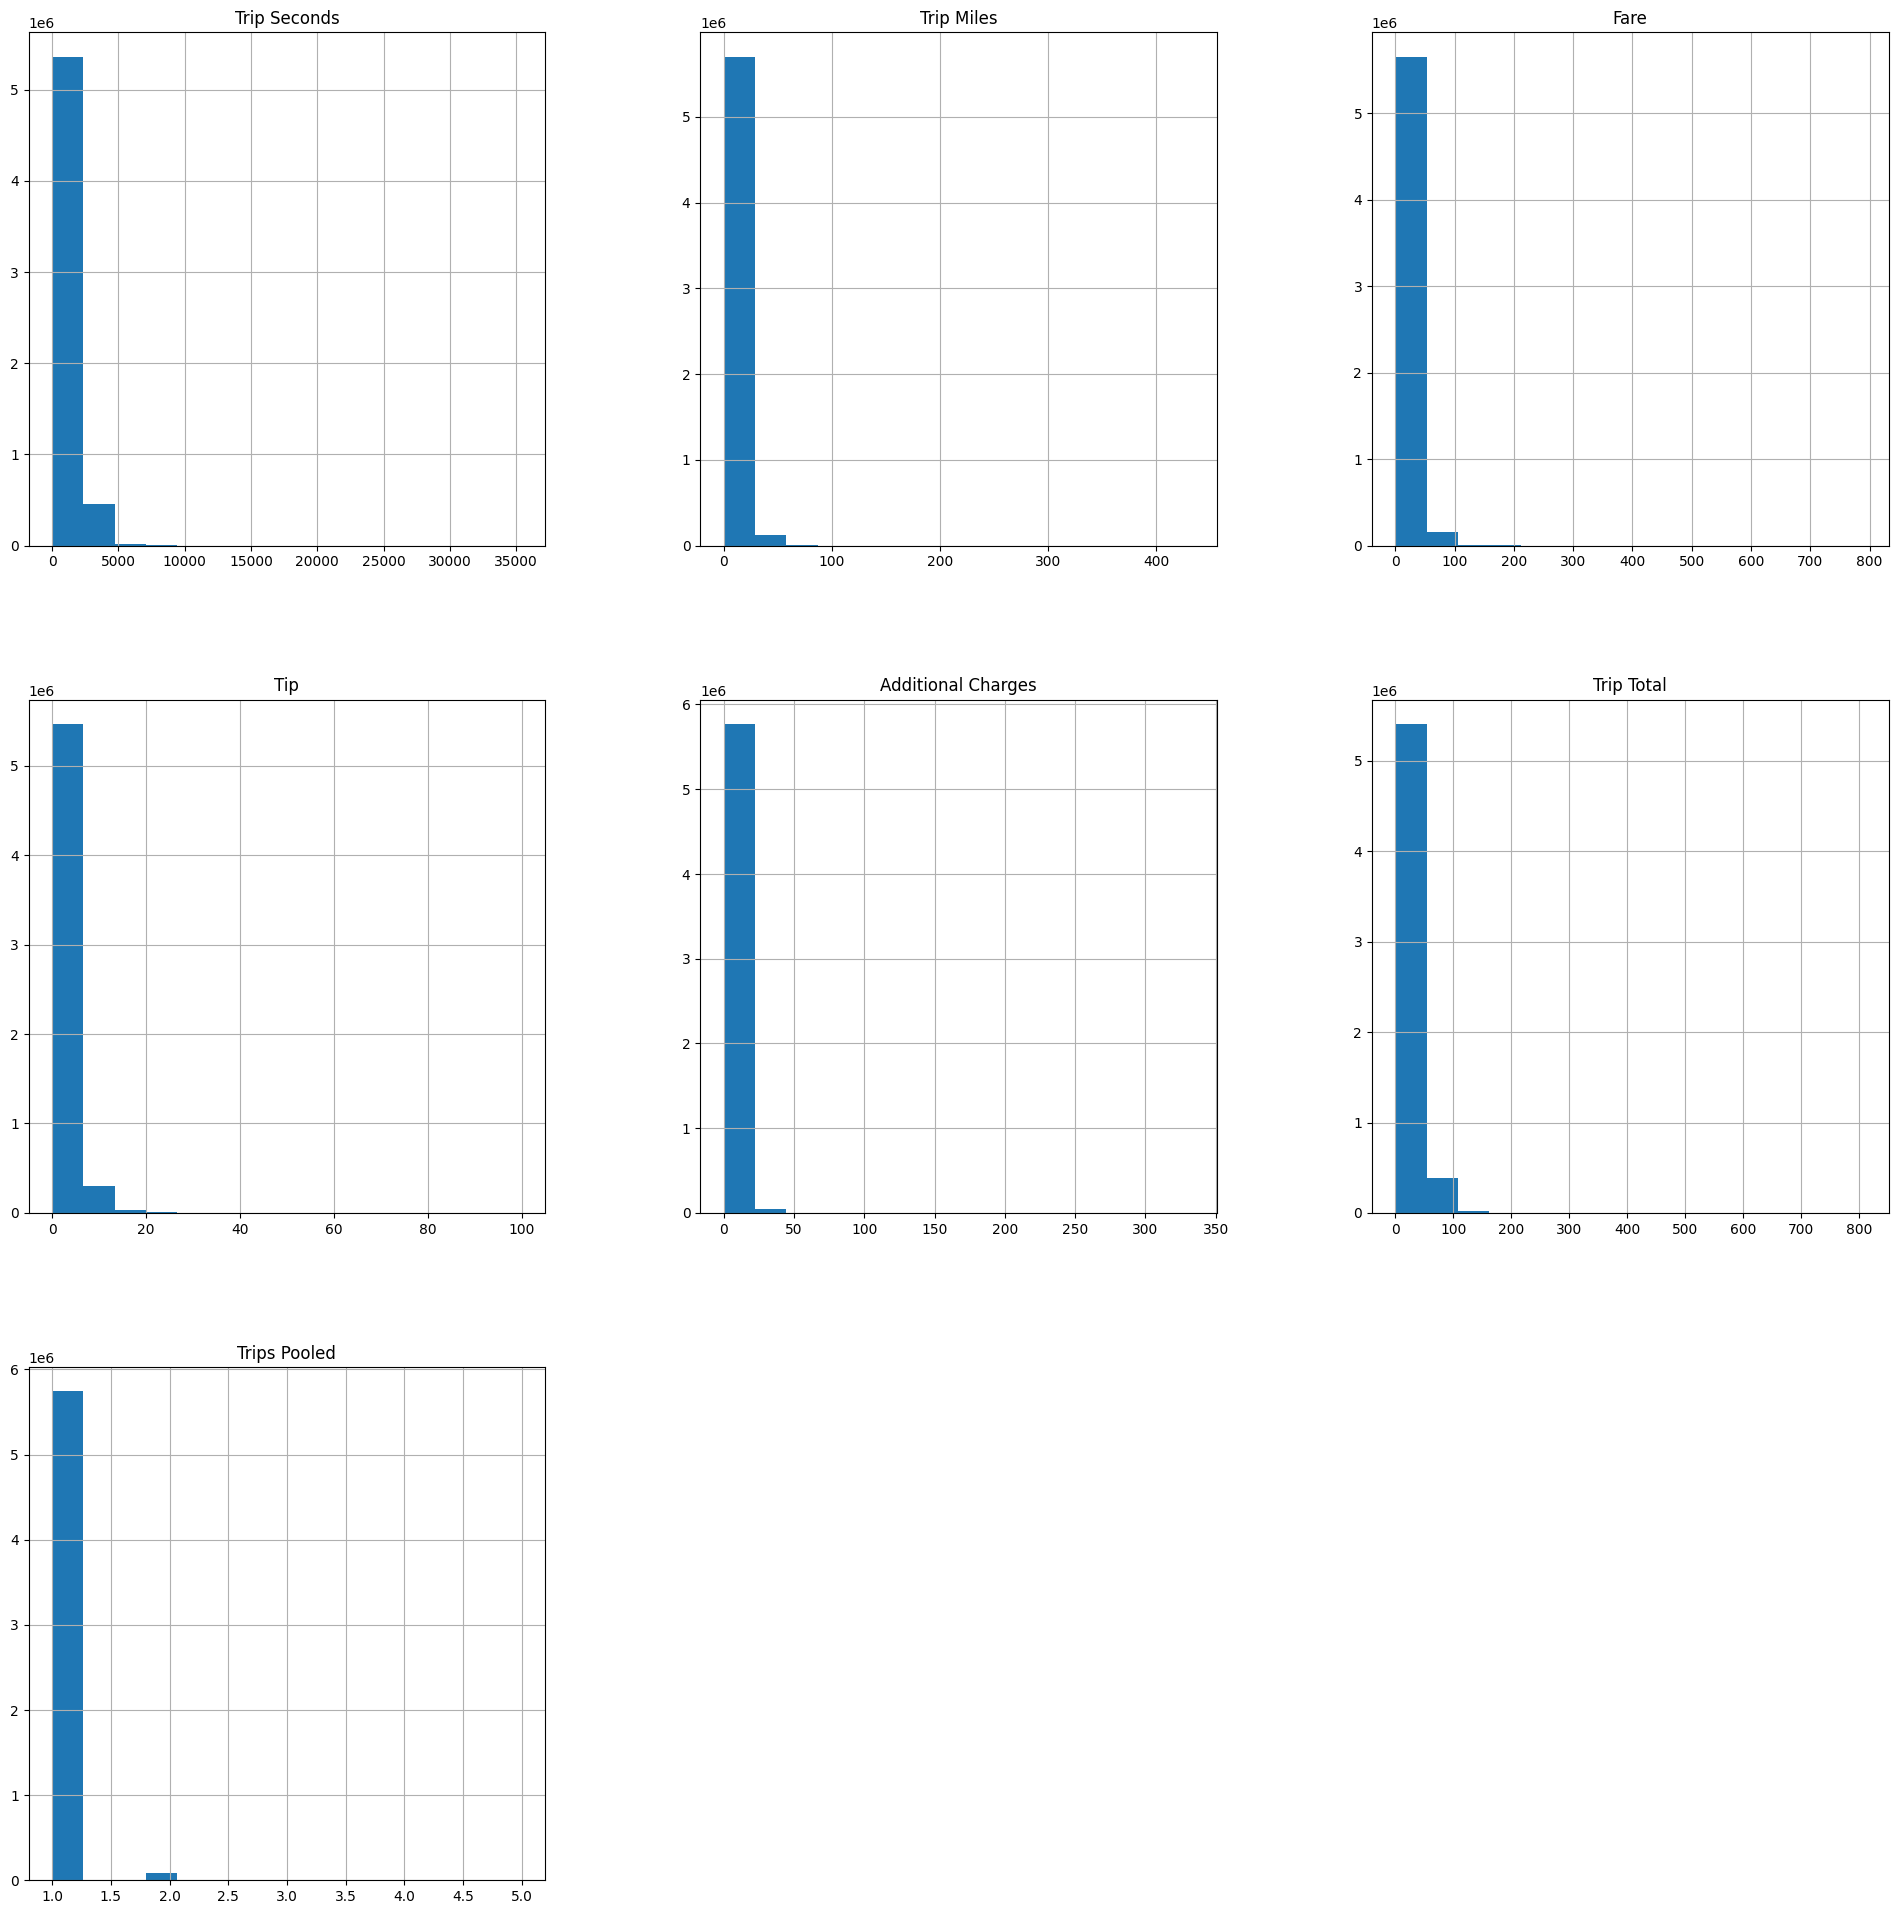

In [79]:
clean_df.hist(column=num_columns, figsize=[24,24], bins=15)
plt.show()

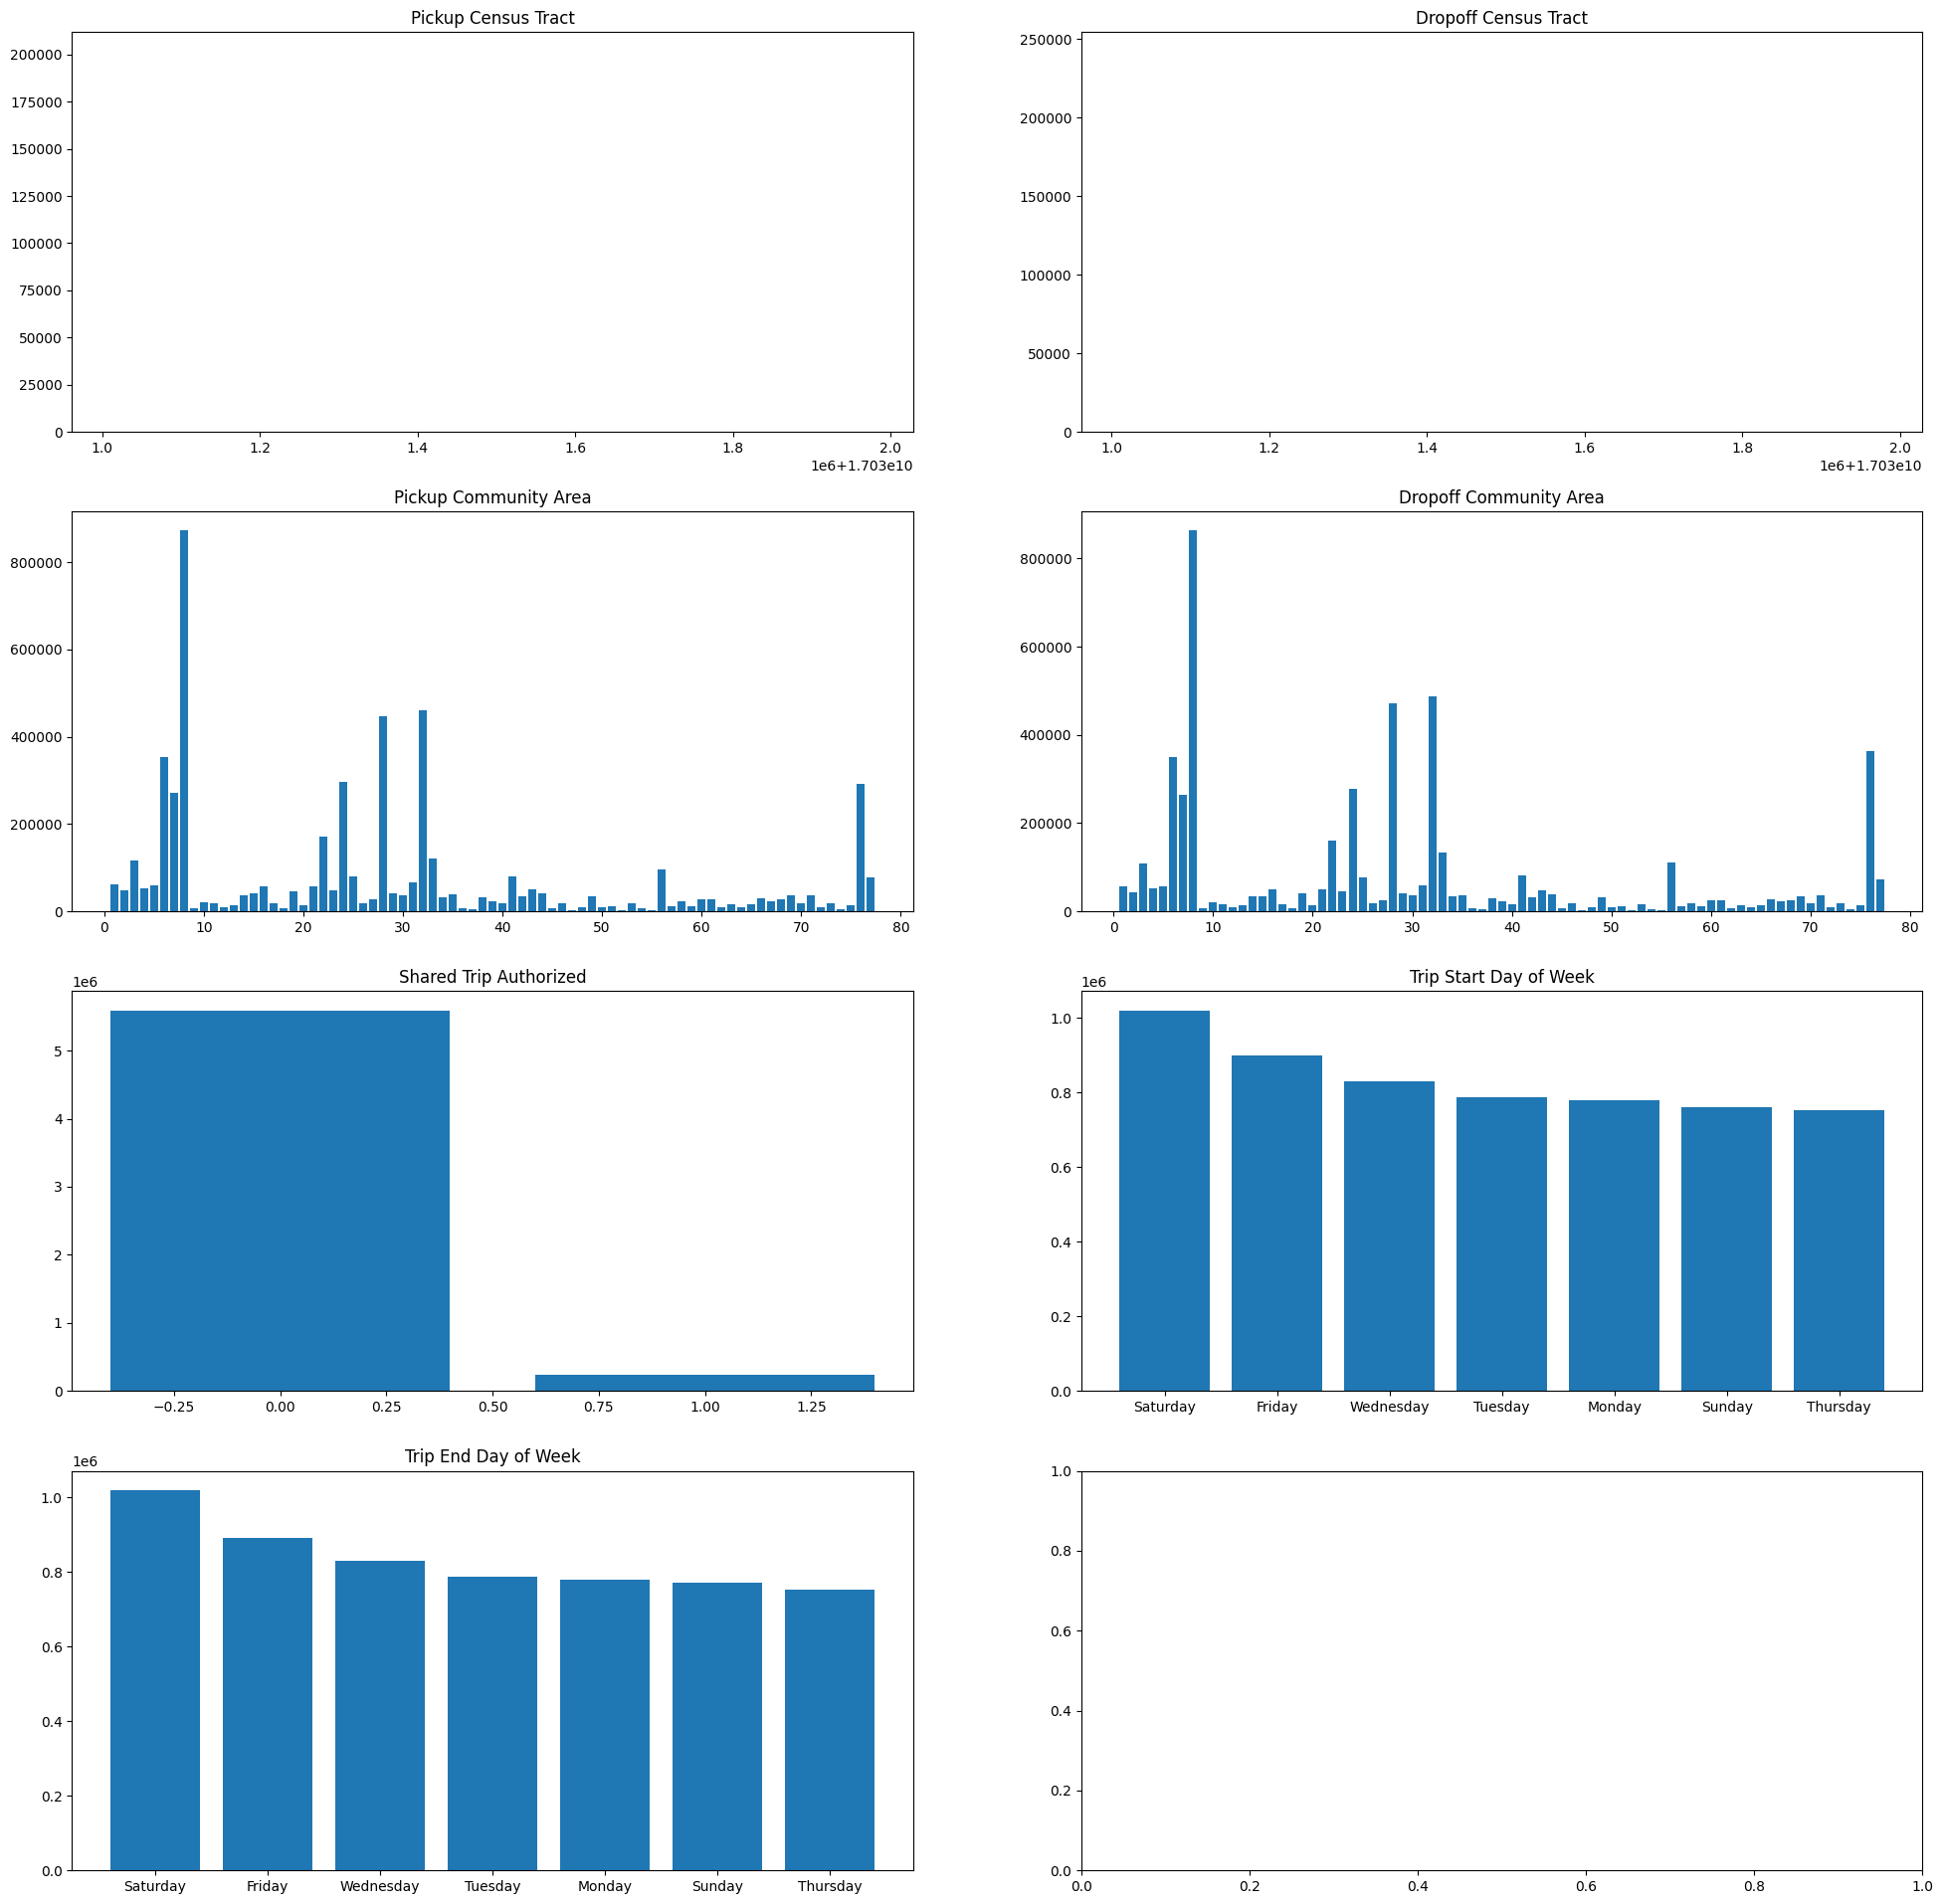

In [91]:
cat_fig, cat_ax = plt.subplots(4, 2, figsize=(24,24))
for i in range(len(cat_columns)):
    value_counts = clean_df[cat_columns[i]].value_counts()
    indices = value_counts.index
    values = value_counts.values
    cat_ax[i//2, i%2].bar(indices, values, width=0.8)
    cat_ax[i//2, i%2].set_title(cat_columns[i])
plt.rcParams["figure.figsize"] = (20, 10)

In [ ]:
clean_df.hist(column=cat_columns, figsize=[24,24])
plt.show()

### Correlation coefficients

/var/folders/p0/q21xykl15gs0d_4t45ny0r500000gn/T/ipykernel_29146/2043227564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = clean_df.corr()


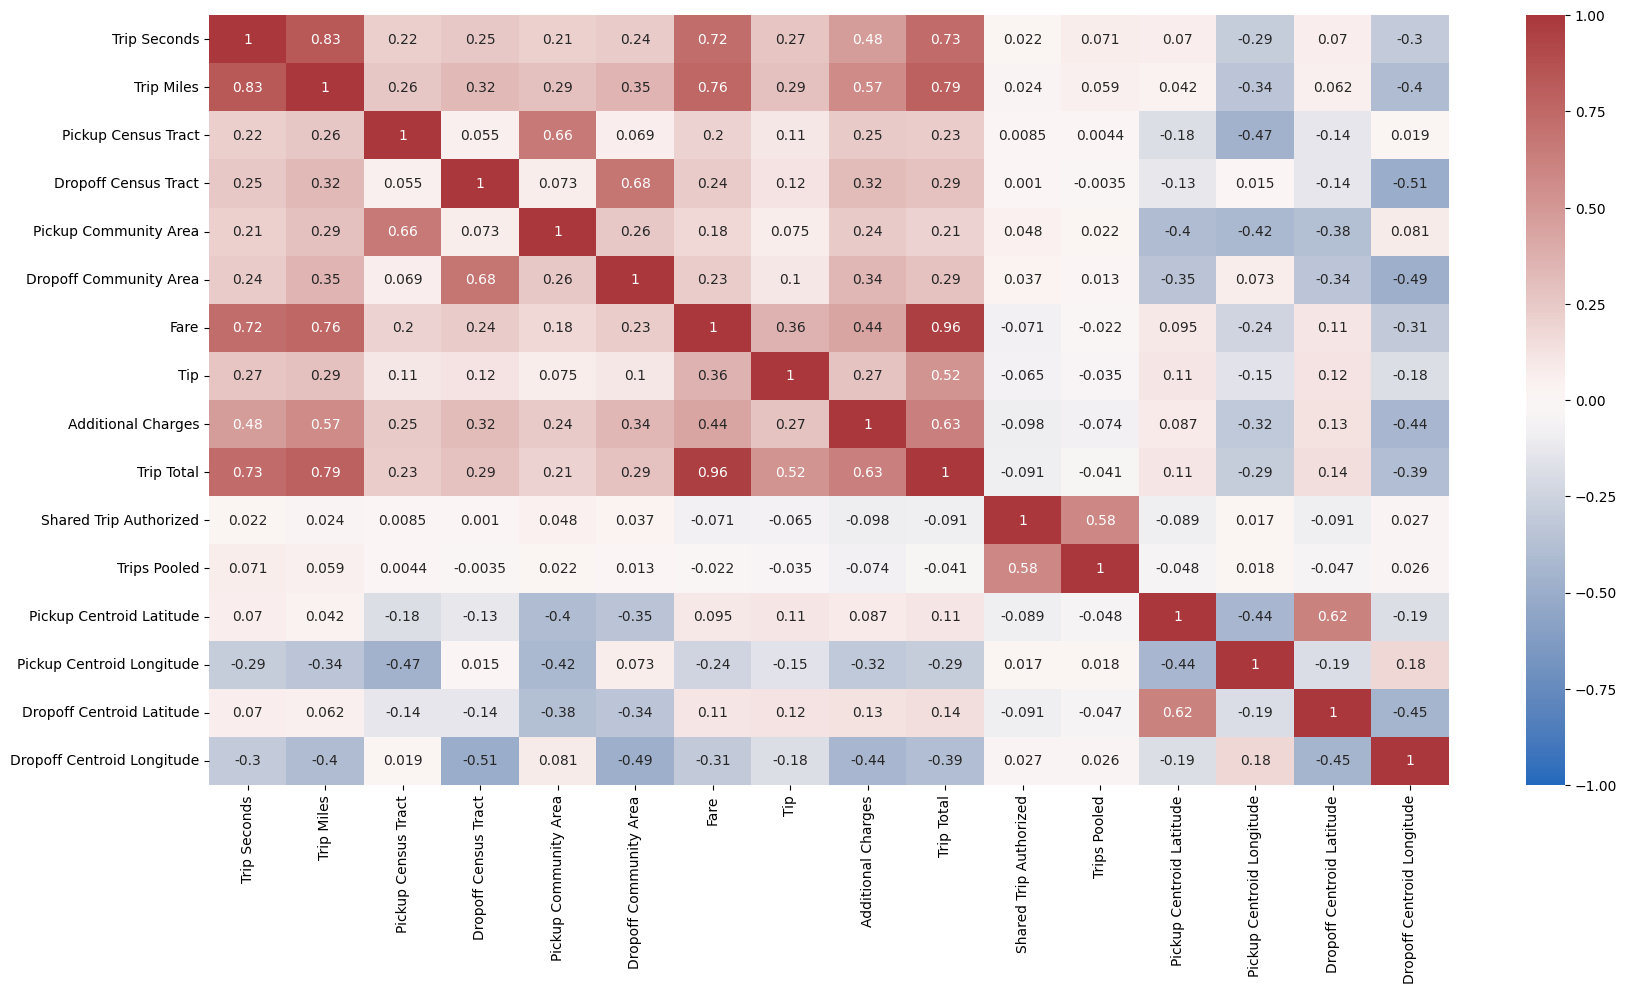

In [124]:
correlations = clean_df.corr()
correlation_heatmap = sb.heatmap(correlations, vmin=-1.0, vmax=1.0, cmap="vlag", center=0.0, annot=True)
plt.show()

## Location-based observations

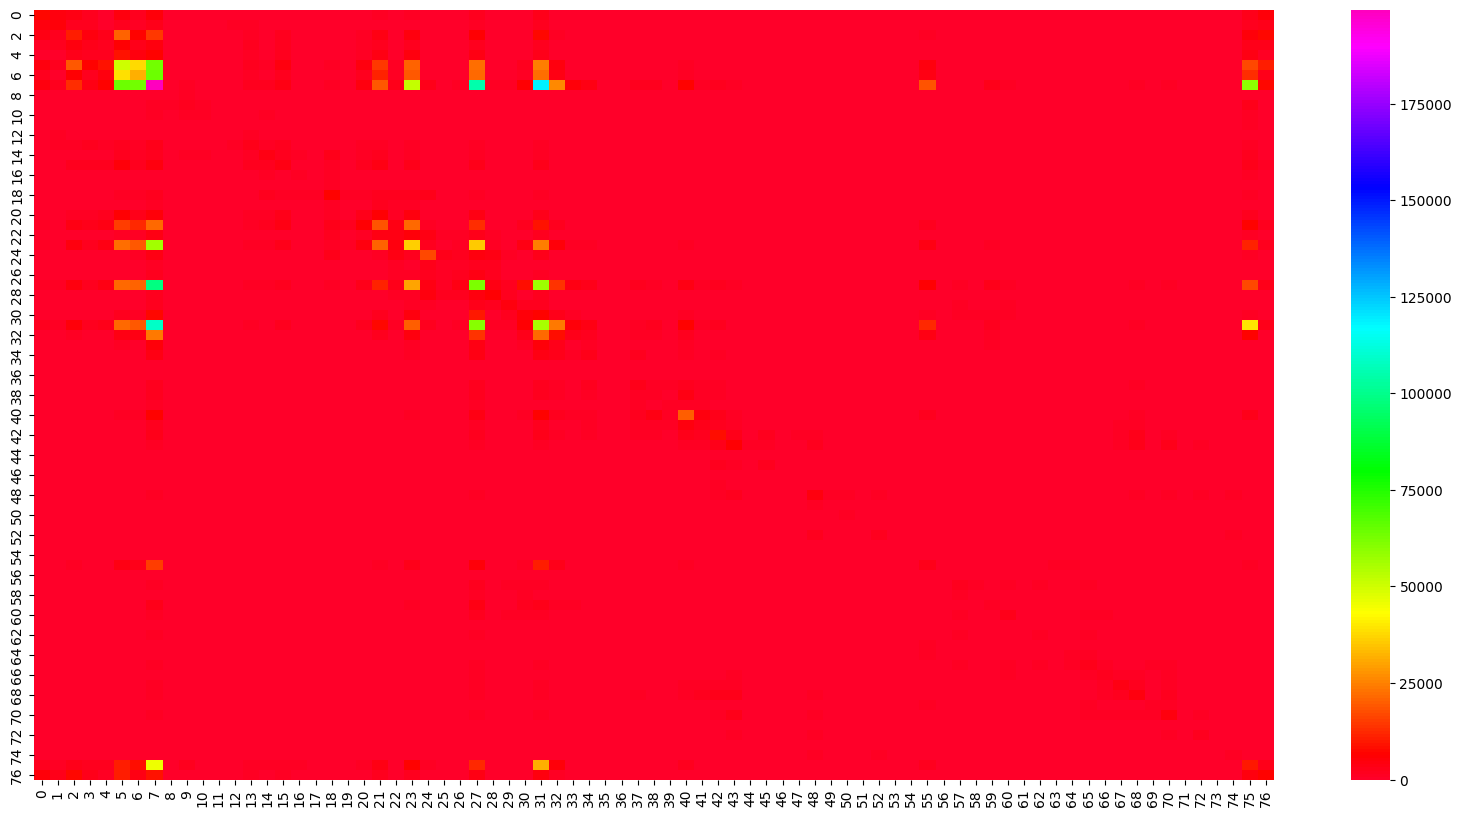

In [144]:
pu_do_matrix = [[0 for _ in range(77)] for _ in range(77)]
def tally_trip(row):
    try:
        pu_do_matrix[int(row['Pickup Community Area'])-1][int(row['Dropoff Community Area'])-1] += 1
    except ValueError:
        return
just_locations = clean_df.loc[:, ['Pickup Community Area', 'Dropoff Community Area']]
just_locations.apply(tally_trip, axis=1)
sb.heatmap(pu_do_matrix, cmap="gist_rainbow")
plt.show()

## Fare, Additional Charges, Trip Total vs. day of the week and/or pickup/dropoff times

In [127]:
clean_df.columns

Index(['Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Trip Start Day of Week', 'Trip End Day of Week'],
      dtype='object')

In [132]:
d1 = clean_df.loc[:, ['Fare', 'Additional Charges', 'Trip Total', 'Trip Start Day of Week', 'Trip Start Timestamp']]
d1

,Fare,Additional Charges,Trip Total,Trip Start Day of Week,Trip Start Timestamp
0,7.5,4.26,11.76,Monday,2022-08-01 00:00:00
1,12.5,0.31,12.81,Monday,2022-08-01 00:00:00
2,47.5,6.81,62.31,Monday,2022-08-01 00:00:00
3,10.0,4.18,14.18,Monday,2022-08-01 00:00:00
4,7.5,3.49,10.99,Monday,2022-08-01 00:00:00
...,...,...,...,...,...
5831172,7.5,4.63,12.13,Wednesday,2022-08-31 23:45:00
5831173,7.5,3.16,10.66,Wednesday,2022-08-31 23:45:00
5831174,5.0,2.91,7.91,Wednesday,2022-08-31 23:45:00
5831175,10.0,2.91,15.91,Wednesday,2022-08-31 23:45:00


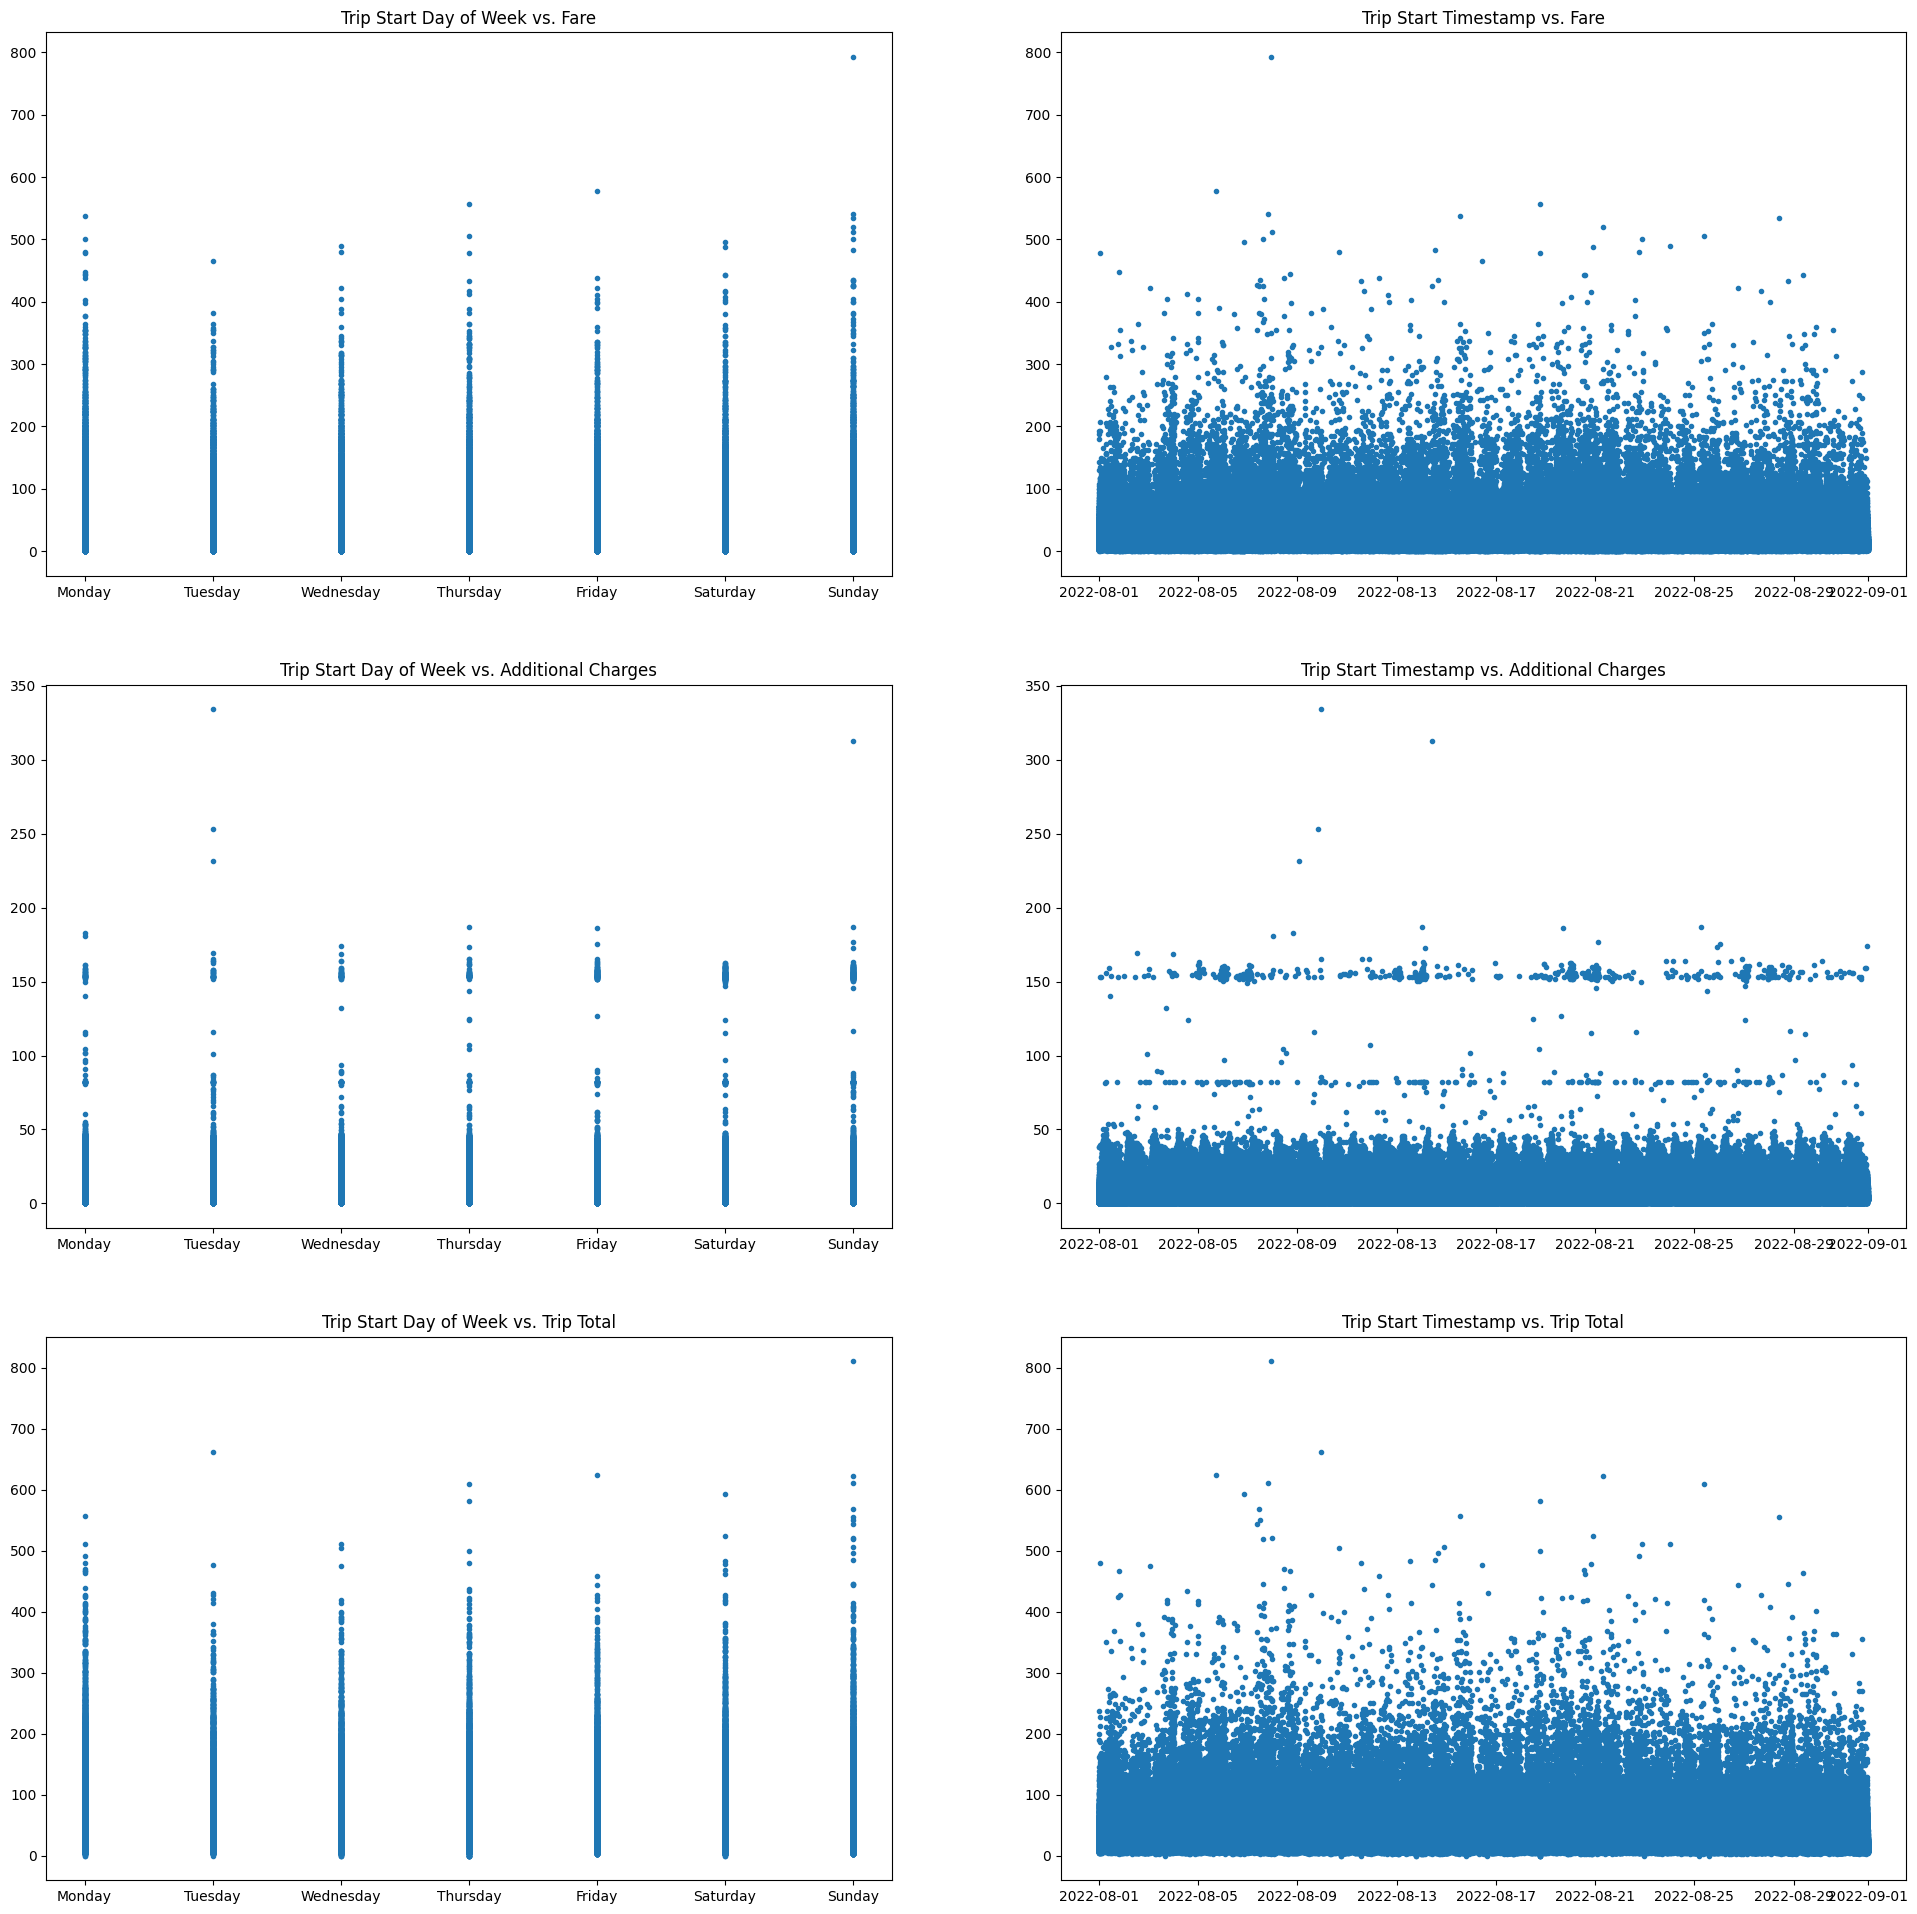

In [155]:
f, a = plt.subplots(3, 2, figsize=(24,24))
m = ['Fare', 'Additional Charges', 'Trip Total']
t = ['Trip Start Day of Week', 'Trip Start Timestamp']
for i in range(len(m)):
    for j in range(len(t)):
        a[i, j].scatter(d1[t[j]], d1[m[i]], marker='.')
        a[i, j].set_title(f'{t[j]} vs. {m[i]}')
# average by day of week and examine in zoom


<AxesSubplot: title={'center': 'Fare'}, xlabel='Trip Start Day of Week'>

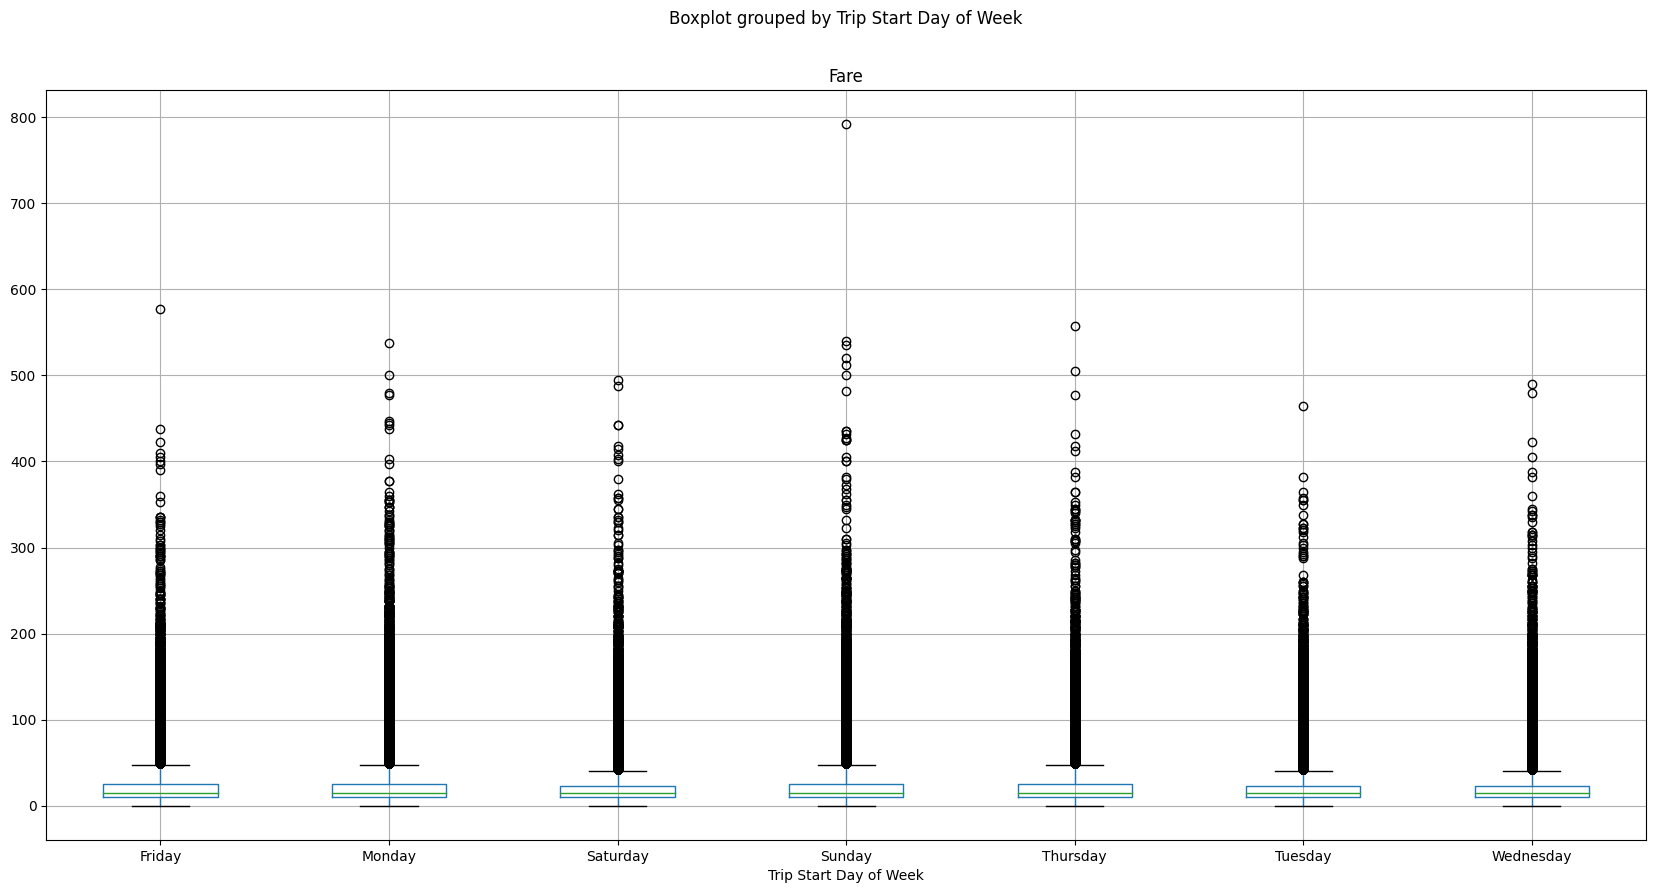

In [153]:
# plt.scatter(d1['Trip Start Day of Week'], d1['Fare'], marker='.')
d1.boxplot(column='Fare', by='Trip Start Day of Week')